In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import normal

def geometric_movement(t, drift=0.1, volatility=0.01, g0=10):
    if not isinstance(t, np.ndarray):
        t = np.array(t)
    # return g0*np.exp((drift-0.5*volatility**2)*t)
    return g0*np.exp(drift*t)

def standard_movement(t, dt=None):
    n = len(t) if isinstance(t, (np.ndarray, list, tuple)) else 1
    std = np.random.standard_normal(size=n)
    return np.cumsum(std)*np.sqrt(dt if dt is not None else t[1]-t[0])

def gbm(t, drift=0.1, volatility=0.01, g0=10, dt=None):
    return geometric_movement(t, drift, volatility, g0) * np.exp(volatility*standard_movement(t, dt))

In [2]:
def plot(t, drift, volatility, g0):
    dt = t[1]-t[0]
    n = len(drift)

    plt.figure(figsize=(30,4*n))
    print(pd.DataFrame({'mu': drift, 'sigma': volatility, 'trend': drift-0.5*volatility**2, 'g0': g0}))

    for i in range(n):
        args = [drift[i], volatility[i], 1]
        g_move = geometric_movement(t, *args)
        g_move_raw = np.log(g_move)
        s_move = volatility[i]*standard_movement(t, dt)
        s_move_tot = g_move_raw + s_move
        gbm_move = g0[i]*np.exp(s_move_tot)

        # print(f'{round(args[0], 7)}\t {round(args[1], 7)}\t {round(args[0]-args[1]**2/2, 7)}')
        # print(f'mu: {args[0]:.5E}\tsigma:{args[1]:.5E}\ttrend{(args[0]-args[1]**2/2):.5E}')

        ax1 = plt.subplot(4,n,i+1)
        plt.xticks(visible=False)
        plt.plot(t, g_move_raw, label='g_move_raw')
        plt.plot(t, s_move, label='s_move')
        plt.legend()

        plt.subplot(4,n,n+i+1, sharex=ax1)
        plt.xticks(visible=False)
        plt.plot(t, s_move_tot, label='s_move_tot')
        plt.legend()

        plt.subplot(4,n,2*n+i+1)
        plt.plot(t, gbm_move, label='gbm_move')
        plt.legend()

        plt.subplot(4,n,3*n+i+1)
        plt.plot(t[1000:3000], gbm_move[1000:3000], label='gbm_move')
        plt.legend()

    plt.show()

         mu     sigma     trend          g0
0  0.000089  0.010273  0.000037  561.420509
1  0.000125  0.010007  0.000075  505.128505
2 -0.000082  0.010648 -0.000138  529.450841


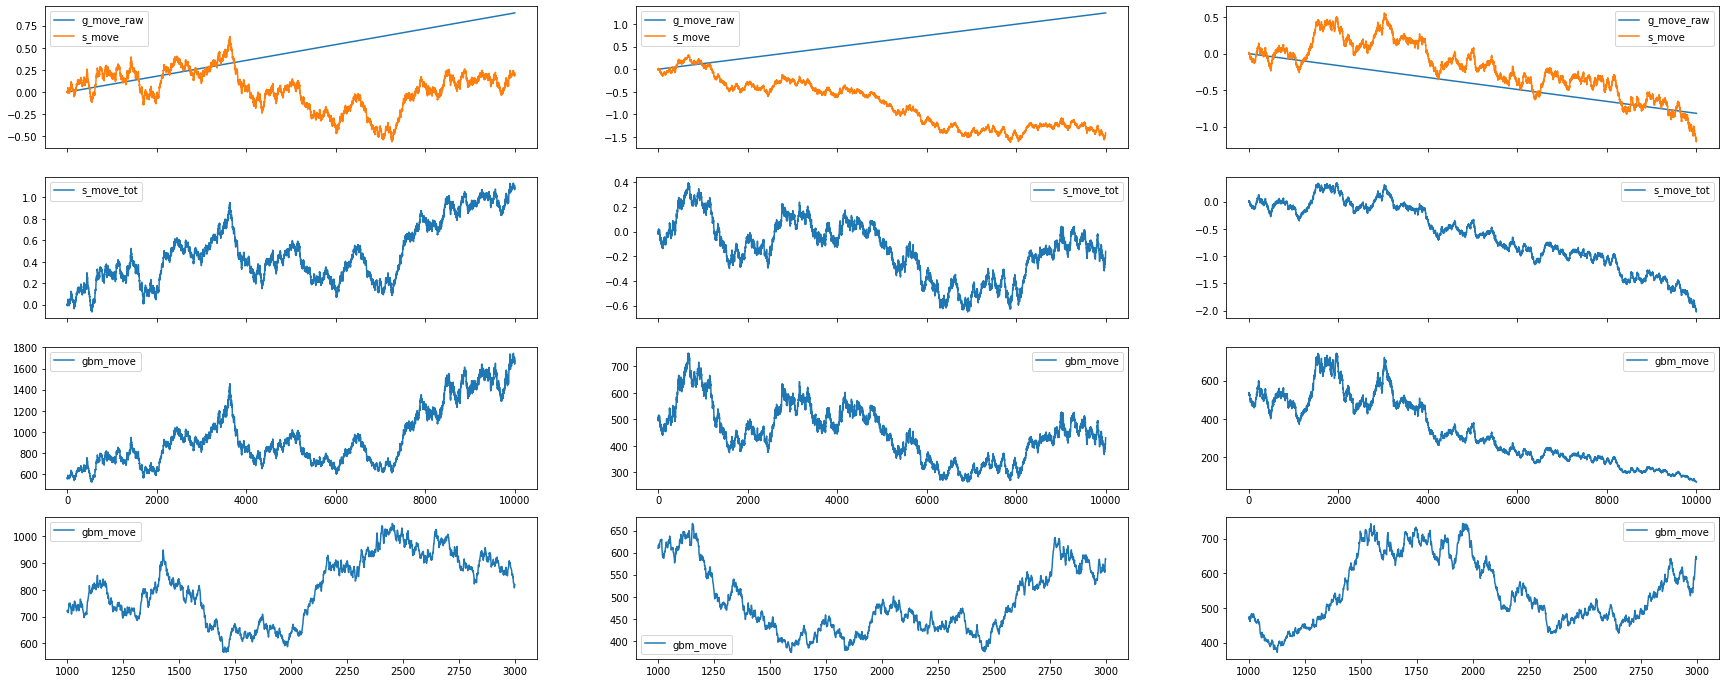

In [10]:
t = np.arange(10000)
mu = normal(1e-4, 1e-4, size=3) * np.random.choice([1,-1], size=3)
# sigma = np.array([normal(u, u) for u in np.sqrt(abs(mu)*2)])
sigma = normal(1e-2, 1e-3, size=3)
g0 = normal(500, 50, size=3)
plot(t, mu, sigma, g0)

In [8]:
10000/(24)

416.6666666666667